## The cell below shows how to use a rootfinder to solve cos(x) = 0.75

/Users/phil/miniconda3/lib/python3.4/site-packages/scipy/optimize/zeros.py


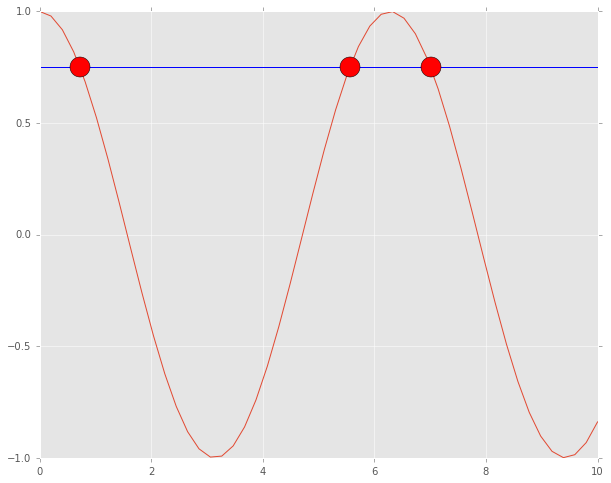

In [3]:
#%matplotlib inline
#from scipy import optimize
#from matplotlib import pyplot as plt
#import numpy as np
#plt.style.use('ggplot')


#xvals=np.linspace(0,10.)
#fig,ax = plt.subplots(1,1,figsize=(10,8))
#ax.plot(xvals,np.cos(xvals))
#straight_line=np.ones_like(xvals)
#ax.plot(xvals,straight_line*0.75,'b-')

#def root_function(x):
    """Function we want to find the root of
       input: x value
       output: y value -- should be zero when x is a root
    """
#    return np.cos(x) - 0.75

#root1 = optimize.zeros.brentq(root_function,0,2)
#root2 = optimize.zeros.brentq(root_function,4,6)
#root3 = optimize.zeros.brentq(root_function,6,8)
#xvals=np.array([root1,root2,root3])
#yvals=np.cos(xvals)
#ax.plot(xvals,yvals,'ro',markersize=20)

#print(optimize.zeros.__file__)

In [4]:
from scipy import optimize
from matplotlib import pyplot as plt
import numpy as np
#help(optimize.zeros.brentq)


/Users/margot/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log


ValueError: f(a) and f(b) must have different signs

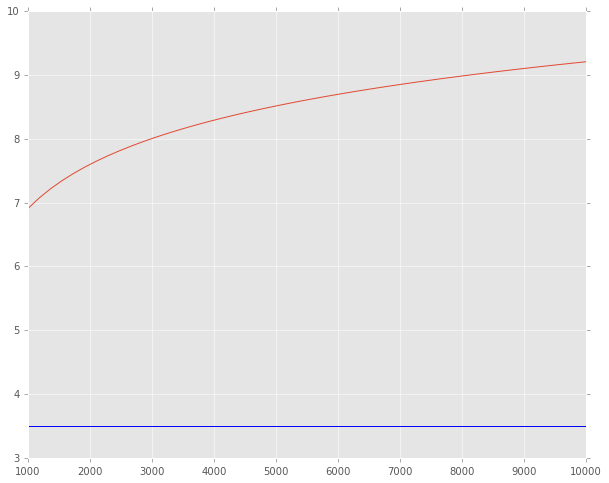

In [37]:
# modified rootfinder to find root of eqn 8 : l_v = T(phi*_v - phi_l)
%matplotlib inline
from scipy import optimize
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')

e_s_0 = 611. #Pa
R_v = 461.5 # J Kg^-1 K^-1
c_pv = 1870. # J Kg^-1 K^-1
c_l = 4187. # J Kg^-1 K^-1
T_0 = 273.15 # K
L_0 = 2.501 * 10** 6 # J Kg^-1
Temp = 277.15 ####### modify to include 10 temps between 0 to 20 deg C
Temp_p = 273.16 # K triple point
beta = (c_pv - c_l)
alpha = L_0 - (T_0 * beta)

epsilon = 3.5 #just used for debugging
#epsilon = np.log(e_s_0) + ((1 /R_v)*(c_pv * np.log(Temp/ Temp_p) - (alpha / Temp) - beta - phi_l)
esvals = np.linspace(1000.,10000.)
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(esvals,np.log(esvals)) #edit
straight_line=np.ones_like(esvals) #edit
ax.plot(esvals,straight_line*epsilon,'b-')
#epsilon = 3.5 #just used for debugging
#epsilon = np.log(e_s_0) + ((1 /R_v)*(c_pv * np.log(Temp/ Temp_p) - (alpha / Temp) - beta - phi_l)

#np.log(esvals) = epsilon





def root_function(x): #modify and make specific
    """Function we want to find the root of
       input: x value
       output: y value -- should be zero when x is a root
    """
    return np.log(x) - epsilon #edit

root1 = optimize.zeros.brentq(root_function,0,2) #automate interval from find_interval
root2 = optimize.zeros.brentq(root_function,4,6) #automate interval from find_interval
root3 = optimize.zeros.brentq(root_function,6,8) #automate interval from find_interval
xvals=np.array([root1,root2,root3])
yvals=np.log(esvals) #edit
ax.plot(esvals,yvals,'ro',markersize=20) #edit

print(optimize.zeros.__file__)

## Problem for Wednesday:  9am

Write a function:
    
    def temp_from_theta(theta,press)
    
that uses brentq to find the temperature for a theta of 280 K and pressures of press=[1.e5, 7.e4, 4.e4] Pascals

Email a working notebook as an attachment, or send a url to a dropbox-like repository

### Solution

In [4]:
def root_function(Tguess,theta,press):
    """Function we want to find the root of
       input: Tguess (K), target theta (K), press (Pa)
       output: difference between guess and target -- should be zero when x is a root
    """
    p0=1.e5  #Pa
    Rd=287. #J/kg/K
    cp=1004.  #J/kg/K     
    theta_guess=Tguess*(p0/press)**(Rd/cp)
    return theta - theta_guess

In [5]:
def temp_from_theta(theta,press):
    """
       input: theta (K), press (Pa)
       output: temp (K) found by rootfinder
    """     
    left=10 #K
    right=1000 #K
    temp = optimize.zeros.brentq(root_function,left,right,args=(theta,press))
    return temp

for press in [1.e5,7.e4,4.e4]:
    print('Temp {:5.2f} (K) at pressure of {:5.2f} kPa'.format(temp_from_theta(280.,press),press*1e-2))

Temp 280.00 (K) at pressure of 1000.00 kPa
Temp 252.86 (K) at pressure of 700.00 kPa
Temp 215.48 (K) at pressure of 400.00 kPa


## Bracket finding

I've written a couple of convenience functions called rootfinder.find_interval and
rootfinder.fzero to make rootfinding a little easier.   The new module is 
[rootfinder.py](https://github.com/phaustin/A405/blob/master/a405thermo/rootfinder.py)


In [6]:
from a405thermo import rootfinder as rf

In [7]:
print(help(rf.find_interval))

Help on function find_interval in module a405thermo.rootfinder:

find_interval(func, x, *args)
    starting from a 2% difference, move out from a 
    point until func changes sign
    
    input func(x,*args): function to zero over x, with optional arguments
          x:  variable to search over for root of func(x,*args)
    output
          left,right  brackets for root

None


### example -- find a bracket for sin(x)=0 near x=12 radians ~ 700 degrees

In [8]:
brackets=rf.find_interval(np.sin,12)
brackets

(11.321177490060915, 12.678822509939085)

## now use the fzero wrapper to find the root of sin(x)=0  (720 degrees)

In [9]:
print(rf.fzero(np.sin,brackets)*180/np.pi)

720.0


## Redo theta example with find_interval

In [39]:
import a405thermo.rootfinder as rf
from importlib import reload
reload(rf)

def theta_zero(Tguess,theta,press):
    """Function we want to find the root of
       input: Tguess (K), target theta (K), press (Pa)
       output: difference between guess and target -- should be zero when x is a root
    """
    p0=1.e5  #Pa
    Rd=287. #J/kg/K
    cp=1004.  #J/kg/K     
    theta_guess=Tguess*(p0/press)**(Rd/cp)
    return theta - theta_guess

In [43]:
import a405thermo.rootfinder as rf
def temp_from_theta(theta,press):
    """
       input: theta (K), press (Pa)
       output: temp (K) found by rootfinder
    """     
    #
    #  use theta as guess for bracket and pass theta,press to theta_zero
    #
    brackets=rf.find_interval(theta_zero,theta,theta,press)
    the_temp = rf.fzero(theta_zero,brackets,theta,press)
    return the_temp

for press in [1.e5,7.e4,4.e4]:
    print('Temp {:5.2f} (K) at pressure of {:5.2f} kPa'.format(temp_from_theta(280.,press),press*1e-2))

Temp 280.00 (K) at pressure of 1000.00 kPa
Temp 252.86 (K) at pressure of 700.00 kPa
Temp 215.48 (K) at pressure of 400.00 kPa
